# Get grid from vertices

Image anallysis to automatically detect the grid is rateher difficult. Instead, I will try to develop a function to get the grid from the coordinates.

The idea is that the front end will ask the user to align the image to a square, so that I csan get the vartices from the hardcoded image vertices, and work my way to the solution from there.

## Draw a grid from the 4 vertices coords

In [1]:
from imageAnalysisGrid import *
import csv
import os
import re

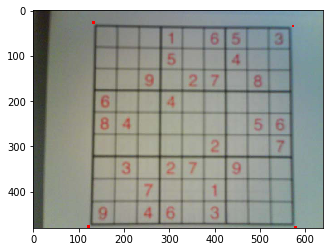

In [2]:
# set up folders
#imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\images\\'
imageDataDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\images\\'

allImages = []
for file in os.listdir(imageDataDir):
    if file.endswith(".jpg"):
        allImages.append(file)
        
# labelled corners
#labelledCornersDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\outlines_sorted.csv'
labelledCornersDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\outlines_sorted.csv'

# read in the labels as a dictionary
image = []
p1_x = []
p1_y = []
p2_x = []
p2_y = []
p3_x = []
p3_y = []
p4_x = []
p4_y = []
with open(labelledCornersDir) as csv_file:
    labelledCorners = csv.reader(csv_file)
    line_count = 0
    for row in labelledCorners:
        if line_count > 0:
            tmpPath = row[0]
            tmpPath = re.sub('./images/', '', tmpPath)
            image.append(tmpPath)
            p1_x.append(int(row[1]))
            p1_y.append(int(row[2]))
            p2_x.append(int(row[3]))
            p2_y.append(int(row[4]))
            p3_x.append(int(row[5]))
            p3_y.append(int(row[6]))
            p4_x.append(int(row[7]))
            p4_y.append(int(row[8]))
        line_count = line_count + 1

cornersDict = {
    'image' : image,
    'p1_x' : p1_x,
    'p1_y' : p1_y,
    'p2_x' : p2_x,
    'p2_y' : p2_y,
    'p3_x' : p3_x,
    'p3_y' : p3_y,
    'p4_x' : p4_x,
    'p4_y' : p4_y
}

##################
#show 1 image


# check on one img
chosenImg = 8
pxlEnlarg = 3
filename = os.path.join(imageDataDir, cornersDict['image'][chosenImg])
img = io.imread(filename)

img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   2] = 0

plt.imshow(img)
plt.show()

the grid is made by 9 squares assumed to be equally spaced in the line between 2 adjacent corners

In [3]:
#Get the 8 corls and rows ids for each of the lines dividing the grid
#p1 and p2
def getCoords(row1, col1, row2, col2):
    allRows = list(map(int, np.linspace(row1, row2, 10)))
    allCols = list(map(int, np.linspace(col1, col2, 10)))
    return(allRows, allCols)

allRowsp12, allColsp12 = getCoords(cornersDict['p1_y'][chosenImg], cornersDict['p1_x'][chosenImg],
                            cornersDict['p2_y'][chosenImg], cornersDict['p2_x'][chosenImg])    

allRowsp23, allColsp23 = getCoords(cornersDict['p2_y'][chosenImg], cornersDict['p2_x'][chosenImg],
                            cornersDict['p3_y'][chosenImg], cornersDict['p3_x'][chosenImg])    

allRowsp43, allColsp43 = getCoords(cornersDict['p4_y'][chosenImg], cornersDict['p4_x'][chosenImg],
                            cornersDict['p3_y'][chosenImg], cornersDict['p3_x'][chosenImg])    

allRowsp14, allColsp14 = getCoords(cornersDict['p1_y'][chosenImg], cornersDict['p1_x'][chosenImg],
                            cornersDict['p4_y'][chosenImg], cornersDict['p4_x'][chosenImg])    

print("1-2")
print(allRowsp12, allColsp12)
print("2-3")
print(allRowsp23, allColsp23)
print("4-3")
print(allRowsp43, allColsp43)
print("1-4")
print(allRowsp14, allColsp14)


1-2
[27, 27, 28, 29, 30, 31, 32, 33, 34, 35] [133, 182, 231, 280, 329, 378, 427, 476, 525, 574]
2-3
[35, 84, 133, 182, 231, 281, 330, 379, 428, 478] [574, 574, 575, 575, 576, 576, 577, 577, 578, 579]
4-3
[477, 477, 477, 477, 477, 477, 477, 477, 477, 478] [122, 172, 223, 274, 325, 375, 426, 477, 528, 579]
1-4
[27, 77, 127, 177, 227, 277, 327, 377, 427, 477] [133, 131, 130, 129, 128, 126, 125, 124, 123, 122]


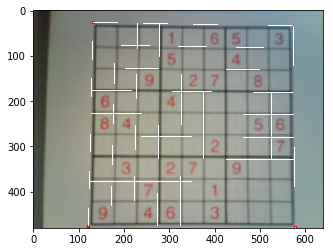

In [4]:
def getLine(row1, col1, row2, col2):
    nPoints = np.amax([np.absolute(row1-row2), np.absolute(col1-col2)])
    xs = list(map(int, np.linspace(row1, row2, nPoints)))
    ys = list(map(int, np.linspace(col1, col2, nPoints)))
    return(xs, ys)


def ColCoord(img, x, y, pxlEnlarg):
    img[x-pxlEnlarg:x+pxlEnlarg, y-pxlEnlarg:y+pxlEnlarg] = 255
    return(img)

imgGrid = img.copy()
# for i in range(0,10):
#     imgGrid = ColCoord(imgGrid, allRowsp12[i], allColsp12[i], 4)


for i in range(0,10):
    xs, ys = getLine(allRowsp12[i], allColsp12[i], allRowsp43[i], allColsp43[i])
    imgGrid[xs, ys] = 255
    xs, ys = getLine(allRowsp23[i], allColsp23[i], allRowsp14[i], allColsp14[i])
    imgGrid[xs, ys] = 255


plt.imshow(imgGrid)
plt.show()


# Get the 100 squares
Save them as list items

In [5]:
imgGrid = np.zeros((img.shape[0], img.shape[1]))

for i in range(0,10):
    xs, ys = getLine(allRowsp12[i], allColsp12[i], allRowsp43[i], allColsp43[i])
    imgGrid[xs, ys] = imgGrid[xs, ys] + 1
    xs, ys = getLine(allRowsp23[i], allColsp23[i], allRowsp14[i], allColsp14[i])
    imgGrid[xs, ys] = imgGrid[xs, ys] + 1

squares = np.argwhere(imgGrid>1)

squareSize = allColsp12[1] - allColsp12[0]
maxCol = np.amax([allColsp12[9], allColsp43[9]])
maxRow = np.amax([allRowsp12[9], allRowsp43[9]])

allSquares = []
imgGray = rgb2gray(img)
for i in range(0, 99):
    rowStart = squares[i][0]
    colStart = squares[i][1]
    rowEnd = rowStart + squareSize
    colEnd = colStart + squareSize
    if colEnd <= maxCol and rowEnd <= maxRow:
        thisSquare = imgGray[rowStart:rowEnd, colStart:colEnd]
        allSquares.append(thisSquare)
    

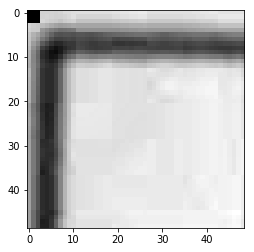

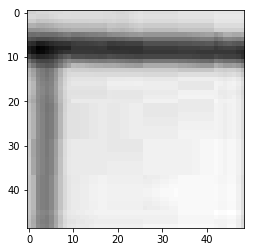

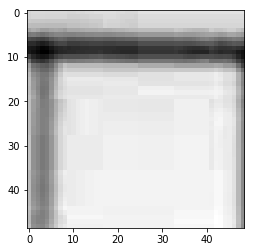

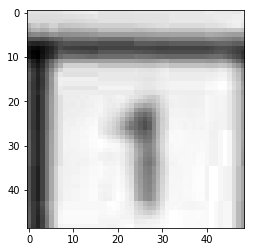

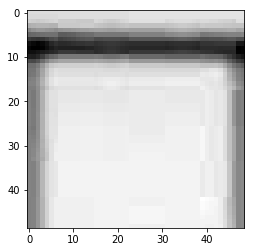

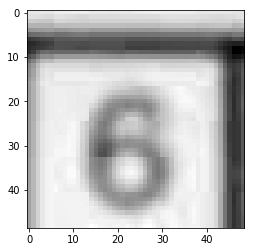

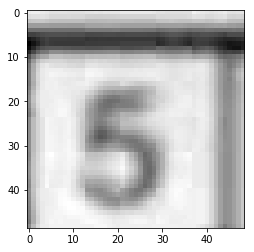

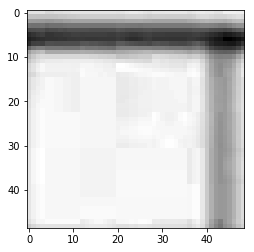

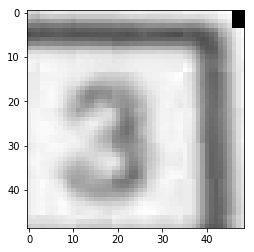

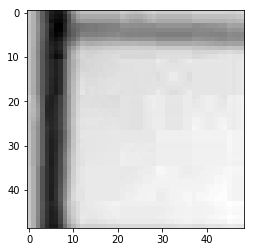

In [6]:
for i in range(0,10):
    plt.imshow(allSquares[i], cmap=plt.cm.gray)
    plt.show()


https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

11493376/11490434 [==============================] - 2s 0us/step
8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
60000/60000 [==============================] - 43s 711us/step - loss: 0.2061 - accuracy: 0.9388
Epoch 2/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0808 - accuracy: 0.9757
Epoch 3/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.0577 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0471 - accuracy: 0.9844
Epoch 5/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0348 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.0302 - accuracy: 0.9897s - l
Epoch 7/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0260 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 39s 655us/step - los

NameError: name 'img_rows' is not defined

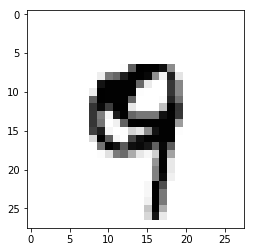

In [8]:
import tensorflow as tf
import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')



# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])




# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))



model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



model.evaluate(x_test, y_test)






9


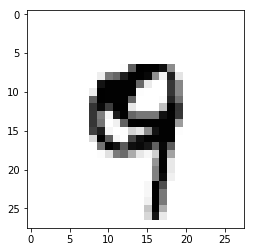

In [9]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, x_test[image_index].shape[0], x_test[image_index].shape[1], 1))
print(pred.argmax())

7


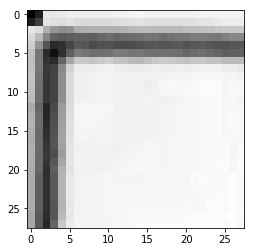

7


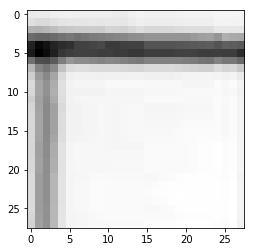

7


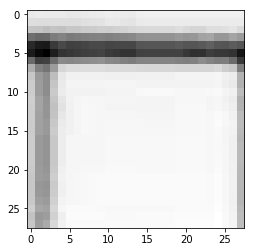

2


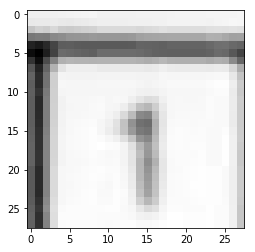

7


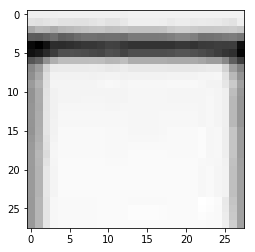

2


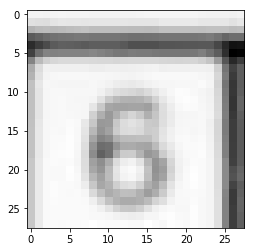

7


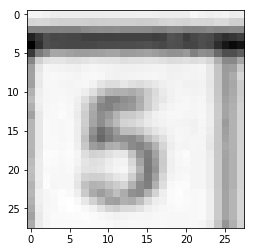

7


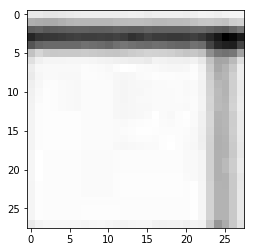

5


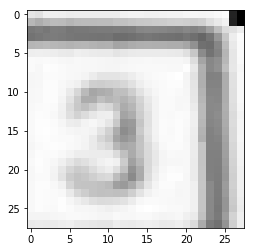

7


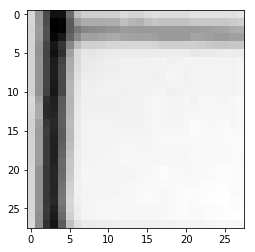

7


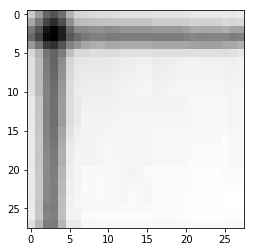

7


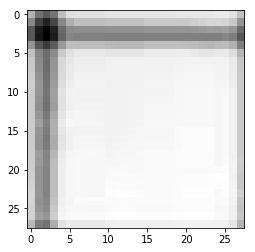

2


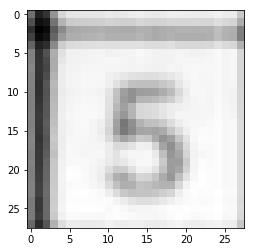

7


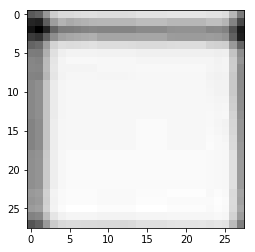

7


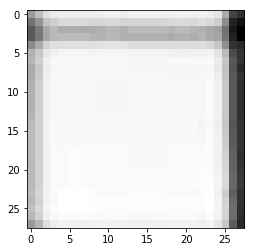

1


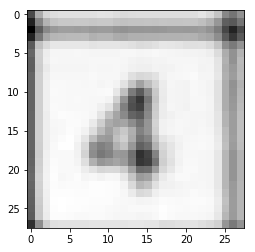

7


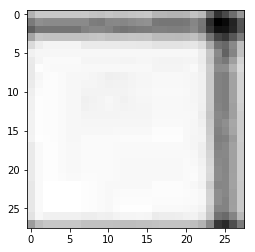

1


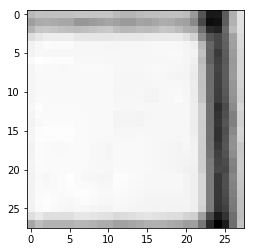

1


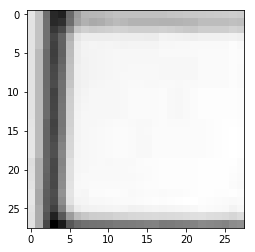

1


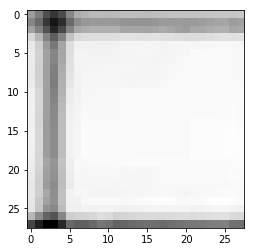

1


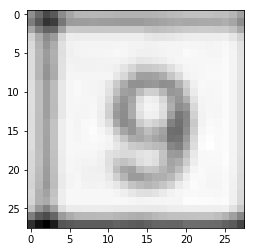

1


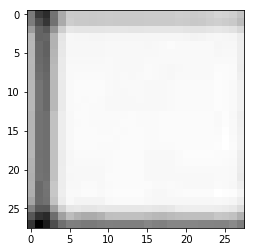

7


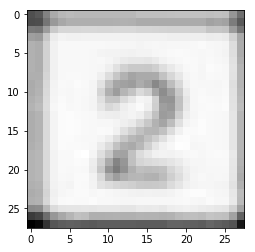

7


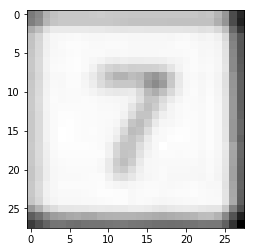

1


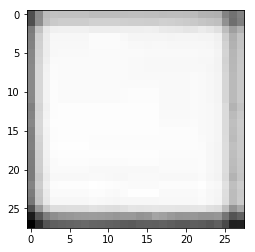

0


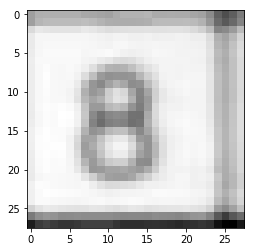

1


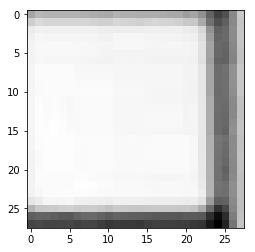

1


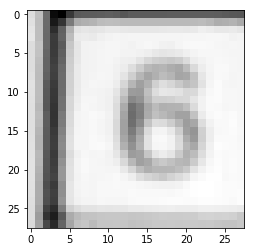

1


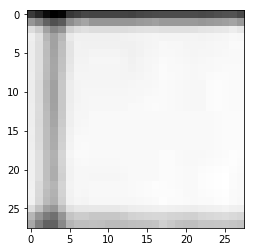

1


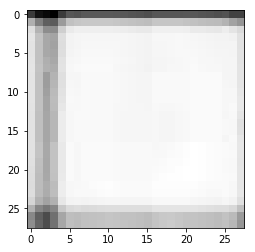

7


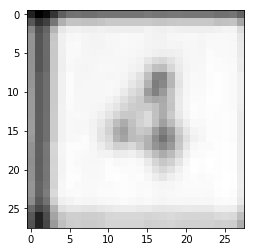

7


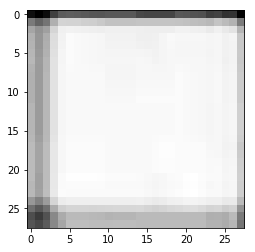

7


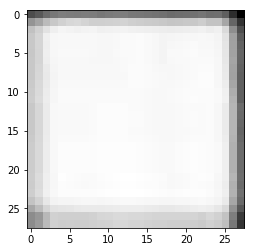

7


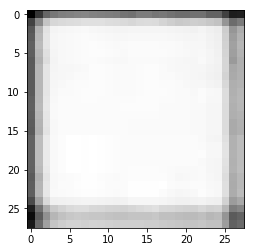

7


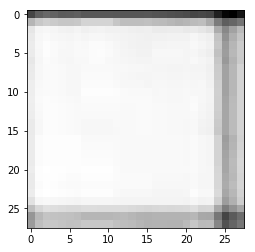

1


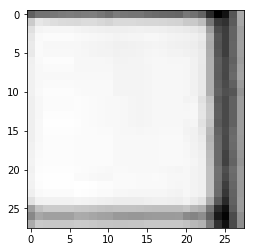

1


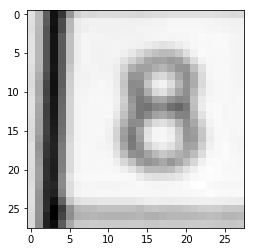

7


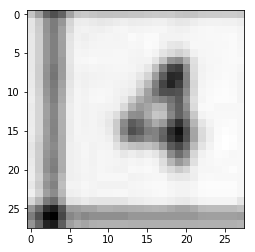

1


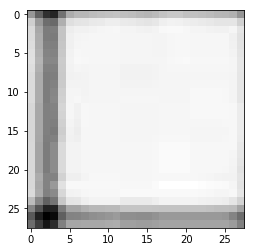

1


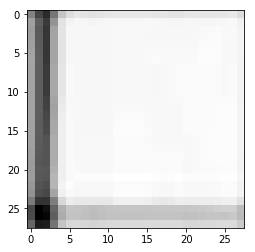

7


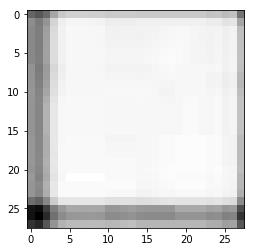

7


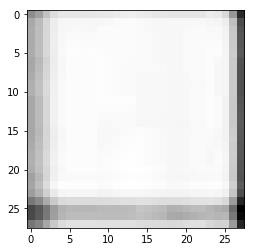

7


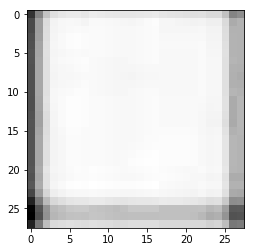

7


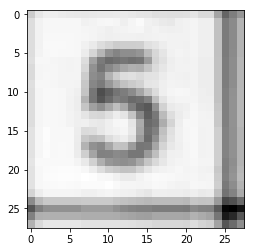

1


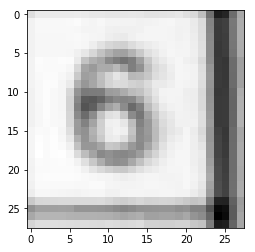

7


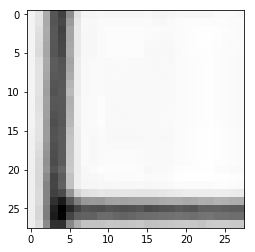

7


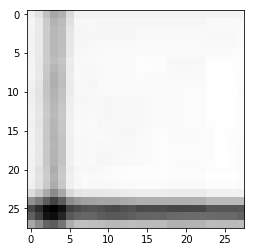

7


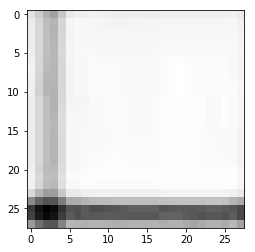

7


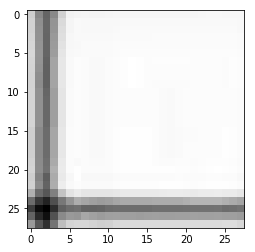

7


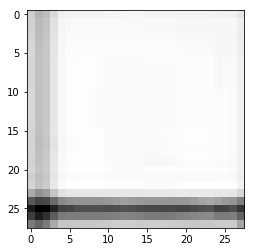

7


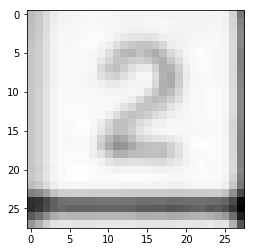

7


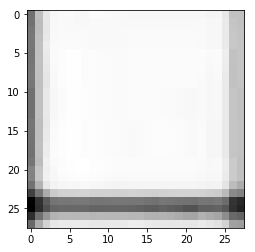

7


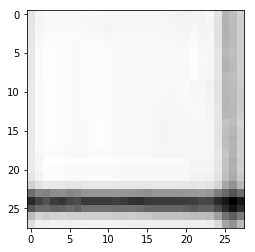

7


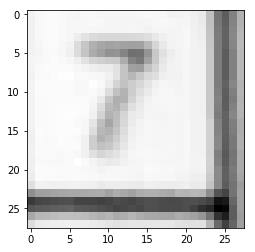

7


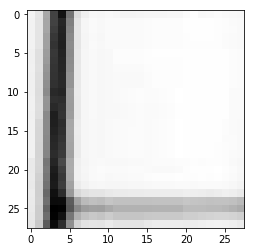

7


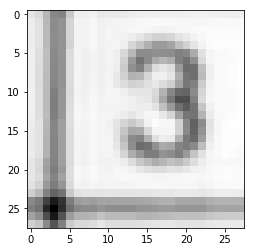

7


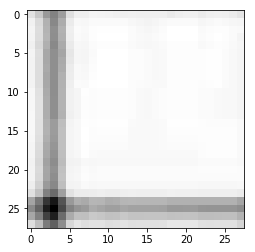

7


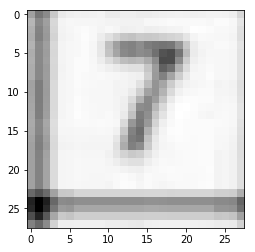

7


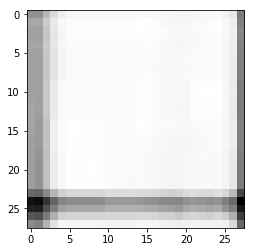

7


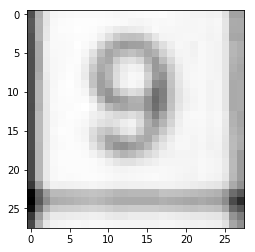

7


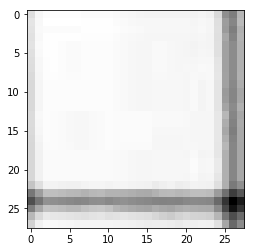

1


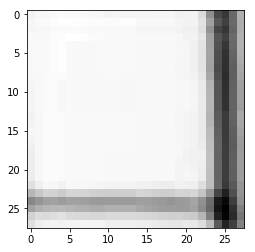

7


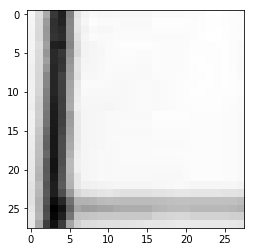

7


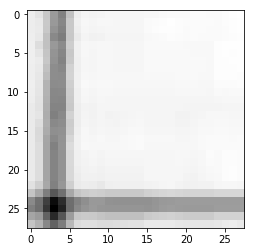

7


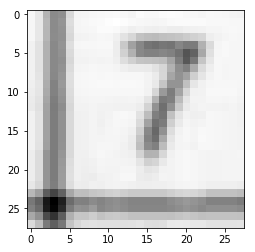

1


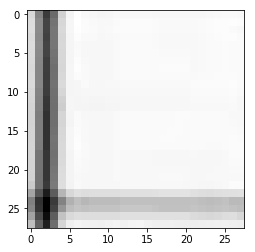

7


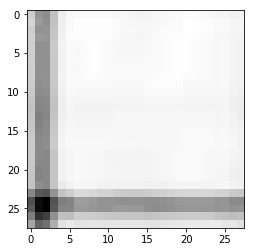

1


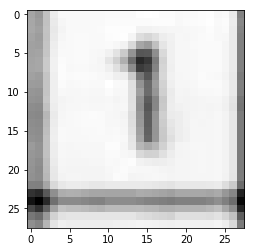

7


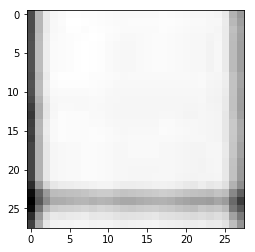

7


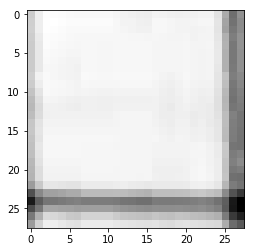

7


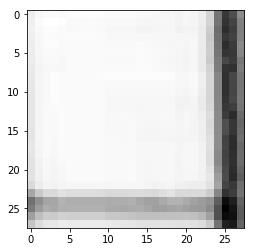

7


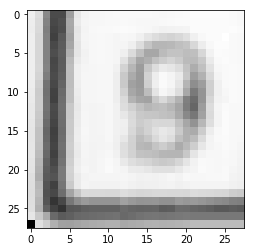

7


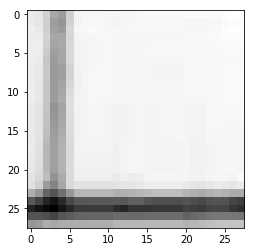

7


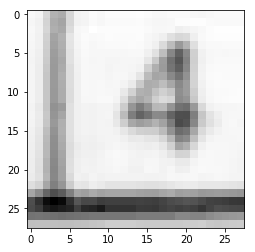

7


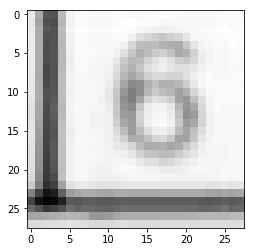

7


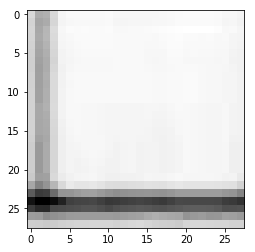

7


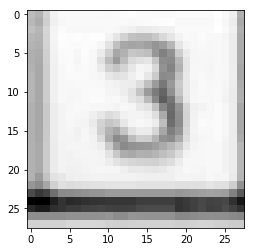

7


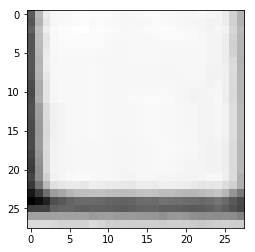

7


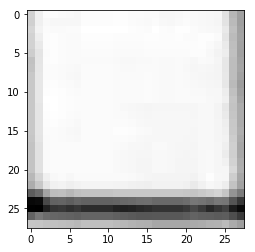

7


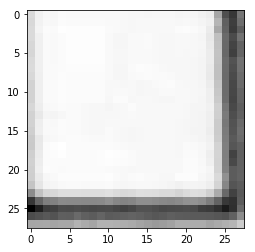

IndexError: list index out of range

In [21]:
from skimage.transform import rescale
from skimage import util

for i in range(0,100):
    pickedImg = i
    image_rescaled = rescale(allSquares[i], 28/49, anti_aliasing=False, multichannel = False)
    image_rescaled = util.invert(image_rescaled)
    plt.imshow(image_rescaled,cmap='Greys')
    pred = model.predict(image_rescaled.reshape(1, image_rescaled.shape[0], image_rescaled.shape[1], 1))
    print(pred.argmax())
    plt.show()



I already have all labelled squares. I could use them instead of MINST to train.

We need to do a few things:

* Create a images for each individual square (save as numpy). Format = imgName_SquareN.py
* Create labels. 2D array of numpy file name and label

## Create images as numpy


In [39]:
#loop through images
for thisImgIdx in range(0, len(allImages)-1):
    filename = os.path.join(imageDataDir, cornersDict['image'][thisImgIdx])
    img = readImg(filename)
    imgGrid = np.zeros((img.shape[0], img.shape[1]))

    for i in range(0,10):
        xs, ys = getLine(allRowsp12[i], allColsp12[i], allRowsp43[i], allColsp43[i])
        imgGrid[xs, ys] = imgGrid[xs, ys] + 1
        xs, ys = getLine(allRowsp23[i], allColsp23[i], allRowsp14[i], allColsp14[i])
        imgGrid[xs, ys] = imgGrid[xs, ys] + 1

    squares = np.argwhere(imgGrid>1)

    squareSize = allColsp12[1] - allColsp12[0]
    maxCol = np.amax([allColsp12[9], allColsp43[9]])
    maxRow = np.amax([allRowsp12[9], allRowsp43[9]])
    

    for i in range(0, 99):
        rowStart = squares[i][0]
        colStart = squares[i][1]
        rowEnd = rowStart + squareSize
        colEnd = colStart + squareSize
        
        if colEnd <= maxCol and rowEnd <= maxRow:
            thisSquare = img[rowStart:rowEnd, colStart:colEnd]
            fileName = cornersDict['image'][thisImgIdx] + "_" + str(i) + ".npy"
            fileName = os.path.join('npyData', fileName)
            np.save(fileName, thisSquare)

print('Done')

Done
